Within the notebook, import the relevant libraries (seaborn, pandas, wandb, pandas profiling), then create a W&B run. NOTE: Remember to add the save_source=True option to wandb.init

In [1]:
import wandb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

In [2]:
#Tracking a jupiter notebook in W&B -> save_code=True
run = wandb.init(
    project = "exercise_4",
    save_code=True
)

wandb: Currently logged in as: dkysylychyn (dkysylychyn-udacity). Use `wandb login --relogin` to force relogin


Fetch the artifact exercise_4/genres_mod.parquet:latest using W&B and read it with pandas

In [3]:
artifact = run.use_artifact("exercise_4/genres_mod.parquet:latest")
local_path = artifact.file()
print(local_path)
df = pd.read_parquet(local_path)
df.head()

./artifacts/genres_mod.parquet:latest/genres_mod.parquet


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,genre,song_name,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,124539,4,Dark Trap,Mercury: Retrograde,None
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,224427,4,Dark Trap,Pathology,None
2,0.850,0.893,5,NaN,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,98821,4,Dark Trap,Symbiote,None
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),None
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,123298,4,Dark Trap,Venom,None


Generate a profile and note the warnings:

In [4]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 40.25it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Remove the duplicates:

In [5]:
df = df.drop_duplicates().reset_index(drop=True)

Let's perform a minimal feature enginnering. Let's create a new feature by concatenating them, after replacing all missing values with the empty string:

In [6]:
df['title'].fillna(value='', inplace=True)
df['song_name'].fillna(value='', inplace=True)
df['text_feature'] = df['title'] + ' ' + df['song_name']

/var/folders/72/w_411c7x47s_m4lv44f0yzhw0000gn/T/ipykernel_3434/668156440.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['title'].fillna(value='', inplace=True)
/var/folders/72/w_411c7x47s_m4lv44f0yzhw0000gn/T/ipykernel_3434/668156440.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Optional: do some plotting with seaborn to get a better idea for the dataset:

In [7]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'duration_ms', 'time_signature', 'genre', 'song_name', 'title',
       'text_feature'],
      dtype='object')

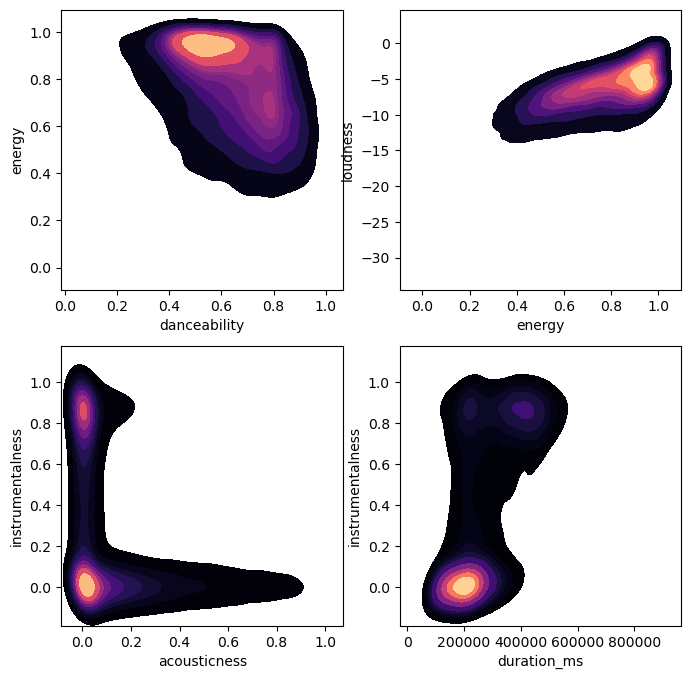

In [8]:
%matplotlib inline
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
sns.kdeplot(data=df, x='danceability', y='energy', fill=True, cmap='magma', thresh=0.05, ax=axes[0,0])
sns.kdeplot(data=df, x='energy', y='loudness', fill=True, cmap='magma', thresh=0.05, ax=axes[0,1])
sns.kdeplot(data=df, x='acousticness', y='instrumentalness', fill=True, cmap='magma', thresh=0.05, ax=axes[1,0])
sns.kdeplot(data=df, x='duration_ms', y='instrumentalness', fill=True, cmap='magma', thresh=0.05, ax=axes[1,1])
plt.show()

When you are done, call run.finish(), close the notebook and stop the jupyter server by clicking on Quit in the main Jupyter page (upper right). NOTE: DO NOT use Crtl+C to shutdown Jupyter. That would also kill the mlflow job.
Go to W&B, navigate to the run you just completed. You will see an option {} in the left panel. Click on it to see the uploaded Jupyter notebook.

In [9]:
run.finish()